In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
plt.style.use('seaborn')

In [3]:
dfx = pd.read_csv('./Dataset/Logistic_X_Train.csv')
dfy = pd.read_csv('./Dataset/Logistic_Y_Train.csv')

In [4]:
dfx.head()

,f1,f2,f3
0,-1.239375,0.749101,-0.528515
1,-1.036070,0.801436,-1.283712
2,-0.615579,1.579521,-1.391927
3,1.335978,1.348651,1.433564
4,0.658925,1.300019,0.571603


In [5]:
dfy.head()

,label
0,1
1,1
2,1
3,0
4,0


In [6]:
xTrain = dfx.values
yTrain = dfy.values

yTrain = yTrain.reshape((-1, ))
print(xTrain.shape, yTrain.shape)

(3000, 3) (3000,)


In [7]:
xTest = pd.read_csv('./Dataset/Logistic_X_Test.csv').values
print(xTest.shape)

(1000, 3)


In [8]:
u = np.mean(xTrain, axis=0)
std = np.std(xTrain, axis=0)

# Apply the transformation
xTrain = (xTrain - u)/std

# Apply the same transformation on test data
xTest = (xTest - u)/std

# Logistic Regression Functions

In [9]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

In [10]:
def hypothesis(x, theta):
    return sigmoid(np.dot(x, theta))

In [11]:
def error(x, y, theta):
    y_ = hypothesis(x, theta)
    e = -1*np.mean((y * np.log(y_) + ((1 - y) * np.log(1 - y_))))
    return e

In [12]:
def gradient(x, y, theta):
    y_ = hypothesis(x, theta)
    grad = -np.dot(x.T, (y - y_))
    return grad / x.shape[0]

In [21]:
def gradientDescent(x, y, learningRate = 1, maxSteps = 300):
    n = x.shape[1]
    theta = np.zeros((n, ))
    errorList = []

    for i in range(maxSteps):
        e = error(x, y, theta)
        errorList.append(e)

        grad = gradient(x, y, theta)
        theta = theta - learningRate * grad

    return theta, errorList

In [22]:
ones = np.ones((xTrain.shape[0], 1))
xNewTrain = np.hstack((ones, xTrain))
print(xNewTrain.shape)
print(xNewTrain[:5])

(3000, 4)
[[ 1.         -0.93471307 -0.24439694 -0.46140414]
 [ 1.         -0.7823013  -0.19327286 -1.08586573]
 [ 1.         -0.46707053  0.56681072 -1.17534766]
 [ 1.          0.99595846  0.34128188  1.16101187]
 [ 1.          0.48839071  0.29377517  0.44826784]]


In [23]:
theta, errorList = gradientDescent(xNewTrain, yTrain)

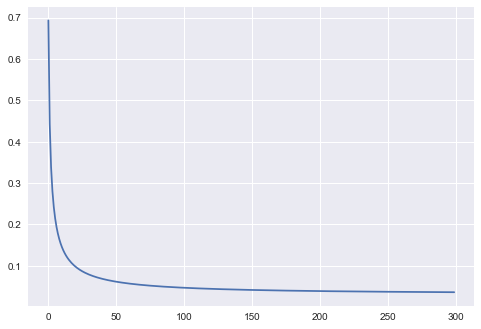

In [24]:
plt.plot(errorList)
plt.show()

# Prediction and Accuracy

In [25]:
def predict(x, theta):
    y_ = hypothesis(x, theta)
    output = np.zeros(y_.shape)
    output[y_ >= 0.5] = 1
    output = output.astype('int')

    return output

In [26]:
ones = np.ones((xTest.shape[0], 1))
xNewTest = np.hstack((ones, xTest))
print(xNewTest.shape)
print(xNewTest[:5])

(1000, 4)
[[ 1.         -0.58096727 -1.23196981 -2.10386172]
 [ 1.         -0.93642077  0.43931113 -0.36596031]
 [ 1.          1.43773502  0.91090225  1.08581064]
 [ 1.         -0.97885386  0.04930706 -0.46041534]
 [ 1.         -0.72880576 -0.05978219 -1.00534038]]


In [27]:
xTrainPreds  = predict(xNewTrain, theta)
xTestPreds = predict(xNewTest, theta)

In [28]:
def accuracy(actual, preds):
    actual = actual.astype('int')
    acc = np.sum(actual == preds) / actual.shape[0]
    return acc * 100

In [29]:
accuracy(yTrain, xTrainPreds)

99.46666666666667

# Using skLearn

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
model = LogisticRegression()

In [32]:
model.fit(xTrain, yTrain)

LogisticRegression()

In [33]:
model.score(xTrain, yTrain)

0.9953333333333333

In [34]:
yPredict = model.predict(xTest)

In [35]:
yPredict[:10]

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 0], dtype=int64)